In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style()

# 2.20

In [2]:
# 4 vectors of real 2-d numbers expressed in the standard basis of real-space:
b1 = np.array([2, 1]).reshape(2, 1)
b2 = np.array([-1, -1]).reshape(2, 1)
b1_prime = np.array([2, -2]).reshape(2, 1)
b2_prime = np.array([1, 1]).reshape(2, 1)

In [3]:
# Two ordered bases
B = (b1, b2)
B_prime = (b1_prime, b2_prime)

#### a. _Show that $B$ and $B^{\prime}$ are two bases in $ \mathbb{R}^2 \$ and draw thoses basis vectors:_  
If a **linearly independent** set of vectors **spans** a subspace then the vectors form a **basis** for that subspace.  

In [4]:
# prove that they span
B = np.array(B).reshape(2, 2).T
B_prime = np.array(B_prime).reshape(2, 2).T
print('B:')
print(B)
print('B_prime:')
print(B_prime)
print('rank of B: ', np.linalg.matrix_rank(B))
print('rank of B_prime: ', np.linalg.matrix_rank(B_prime))
print('determinant of B: ', np.linalg.det(B))
print('determinant of B_prime: ', np.linalg.det(B_prime))

B:
[[ 2 -1]
 [ 1 -1]]
B_prime:
[[ 2  1]
 [-2  1]]
rank of B:  2
rank of B_prime:  2
determinant of B:  -1.0
determinant of B_prime:  4.0


$B$ and $B^{\prime}$ span $ \mathbb{R}^2 $ since they both have rk() = 2.  
Since the determinant of both $B$ and $B^{\prime}$ are not zero, they are invertible and have solutions.  
[If a matrix is invertible, then the homogenous system only has trivial solutions](https://math.libretexts.org/Bookshelves/Linear_Algebra/Map%3A_Linear_Algebra_(Waldron_Cherney_and_Denton)/07%3A_Matrices/7.05%3A_Inverse_Matrix), i.e. 

$ \Sigma_{i=1}^2\lambda_ib_i = 0\$

$ \Sigma_{i=1}^2\lambda_ib_i^{prime} = 0\$

In [5]:
# solving this to double check
"""
np.linalg.solve()
Solve a linear matrix equation, or system of linear scalar equations.

Computes the "exact" solution, `x`, of the well-determined, i.e., full
rank, linear matrix equation `ax = b`.
"""
print(np.linalg.solve(B, [0, 0]))
print(np.linalg.solve(B_prime, [0, 0]))

[ 0. -0.]
[0. 0.]


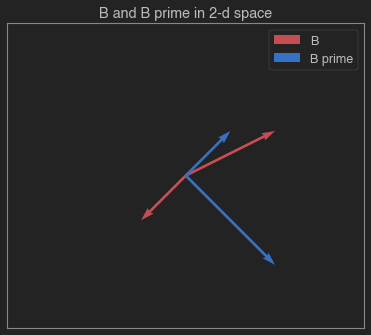

In [6]:
# https://stackoverflow.com/questions/42281966/how-to-plot-vectors-in-python-using-matplotlib
# draw the vectors (Note that these vectors are to scaled to each other, not the coordiate system)
origin = ([[0, 0], [0, 0]])
B_plot = plt.quiver(*origin, *B, color=['r'], scale=8, label='B')
B_prime_plot = plt.quiver(*origin, *B_prime, color='b', scale=8, label='B prime')
plt.xticks([])
plt.yticks([])
plt.legend()
plt.title('B and B prime in 2-d space')
plt.show()

#### b. _Compute matrix **P_1** that performs a basis change from $B^{\prime}$ -> $B$_
$B = \begin{bmatrix}
2&-1 \\
1&-1 \\
\end{bmatrix}$

$B^{\prime} = \begin{bmatrix}
2&1 \\
-2&1 \\
\end{bmatrix}$

To find matrix $P_1$ that changes the basis $B^{\prime}$ to $B$, first express the basis vectors of $B^{\prime}$ as linear combinations of the basis vectors of $B$:

$\begin{bmatrix}
2 \\
-2 \\
\end{bmatrix} = a
\begin{bmatrix}
2 \\
1 \\
\end{bmatrix} + b
\begin{bmatrix}
-1 \\
-1 \\
\end{bmatrix} = 
\begin{bmatrix}
2&-1 \\
1&-1 \\
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
\end{bmatrix}$

$\begin{bmatrix}
1 \\
1 \\
\end{bmatrix} = c
\begin{bmatrix}
2 \\
1 \\
\end{bmatrix} + d
\begin{bmatrix}
-1 \\
-1 \\
\end{bmatrix} = 
\begin{bmatrix}
2&-1 \\
1&-1 \\
\end{bmatrix}
\begin{bmatrix}
c \\
d \\
\end{bmatrix}$


In [7]:
a, b = np.linalg.solve(B, B_prime[:, 0])
c, d = np.linalg.solve(B, B_prime[:, 1])
print("a" , a)
print("b" , b)
print("c" , c)
print("d" , d)
P_1 = np.array([[int(a), int(b)], [int(c), int(d)]]).T
print()
print("P_1")
print(P_1)

a 4.0
b 6.0
c 0.0
d -1.0

P_1
[[ 4  0]
 [ 6 -1]]



$P_1 = \begin{bmatrix}
a&c \\
b&d \\
\end{bmatrix}$

$P_1 = \begin{bmatrix}
4&0 \\
6&-1 \\
\end{bmatrix}$

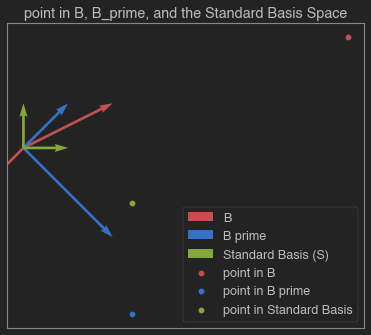

point in standard basis:  [1] [-1]
point in B :  [3] [2]
point in B_prime :  [1] [-3]


In [8]:
# showing this
starting_point = (1,-1)

point = np.array(starting_point).reshape(2, 1)
point_in_B_prime = np.matmul(B_prime, point)
point_in_B = np.matmul(B, point)
S = np.array([[1, 0], [0,1]]).reshape(2,2) # cartesian coords
point_in_S = np.matmul(S, point)
origin = ([[0, 0], [0, 0]])
B_plot = plt.quiver(*origin, *B, color=['r'], scale=8, label='B')
B_prime_plot = plt.quiver(*origin, *B_prime, color='b', scale=8, label='B prime')
S_plot = plt.quiver(*origin, *S, color=['g'], scale=8, label='Standard Basis (S)')
plt.scatter(*point_in_B, label='point in B', color='r')
plt.scatter(*point_in_B_prime, label='point in B prime', color='b')
plt.scatter(*point_in_S, label='point in Standard Basis', color='g')
plt.xticks([])
plt.yticks([])
plt.legend(loc='lower right')
plt.title('point in B, B_prime, and the Standard Basis Space')
plt.show()
print("point in standard basis: ", *point)
print("point in B : ", *point_in_B)
print("point in B_prime : ", *point_in_B_prime)

#### c. three vectors in the space of all real numbers in 3 dimensions

In [9]:
c1 = np.array([1, 2, -1]).reshape(3, 1)
c2 = np.array([0, -1, 2]).reshape(3, 1)
c3 = np.array([1, 0, -1]).reshape(3, 1)

In [10]:
C = (c1, c2, c3)

 ###### i. Show that $C$ is a basis of $\mathbb{R}^3 \$ using determinants. 

In [11]:
C = np.array(C).reshape(3, 3).T
C

array([[ 1,  0,  1],
       [ 2, -1,  0],
       [-1,  2, -1]])

In [12]:
# same as above
print('det(C) = ', np.linalg.det(C))
print('rk(C) = ', np.linalg.matrix_rank(C))

det(C) =  3.999999999999999
rk(C) =  3


###### ii. Let us call $C^{\prime}$ the standard basis of $\mathbb{R}^3 $. Determinge matrix $P2$ that performs the basis change from $C$ to $C^{\prime}$

In [13]:
# the basis change is just C prime